In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [93]:
# Load dataset
df = pd.read_csv("dataset/air_quality_data_fix.csv")  # Sesuaikan dengan lokasi file Anda

# Fitur (input): Konsentrasi polutan
features = df[["co", "no2", "o3", "pm10", "pm25", "so2"]]
target = df["universal_aqi"]

# Normalisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [94]:
# Bangun model neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
# Latih model
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    verbose=1
)

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2648.4028 - mae: 47.4952 - val_loss: 2622.8735 - val_mae: 47.3159
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2580.8958 - mae: 46.6416 - val_loss: 2303.3127 - val_mae: 44.0112
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2148.1758 - mae: 42.1635 - val_loss: 1577.5038 - val_mae: 35.6348
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1335.9424 - mae: 32.2028 - val_loss: 626.6043 - val_mae: 21.5809
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 475.0079 - mae: 18.5069 - val_loss: 152.4905 - val_mae: 10.3206
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 131.6971 - mae: 9.4564 - val_loss: 85.6001 - val_mae: 7.5333
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86.7631 - mae: 7.5651 - val_loss: 74.6263 - val_mae: 6.9996
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73.7281 - mae: 6.8898 - val_loss: 68.3727 - val_mae: 6.6820
Epoch 9/50
1

In [96]:
# Evaluasi model pada data uji
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Cetak hasil evaluasi
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6440 - mae: 0.9418
Test Loss: 3.7046446800231934, Test MAE: 0.9527748823165894


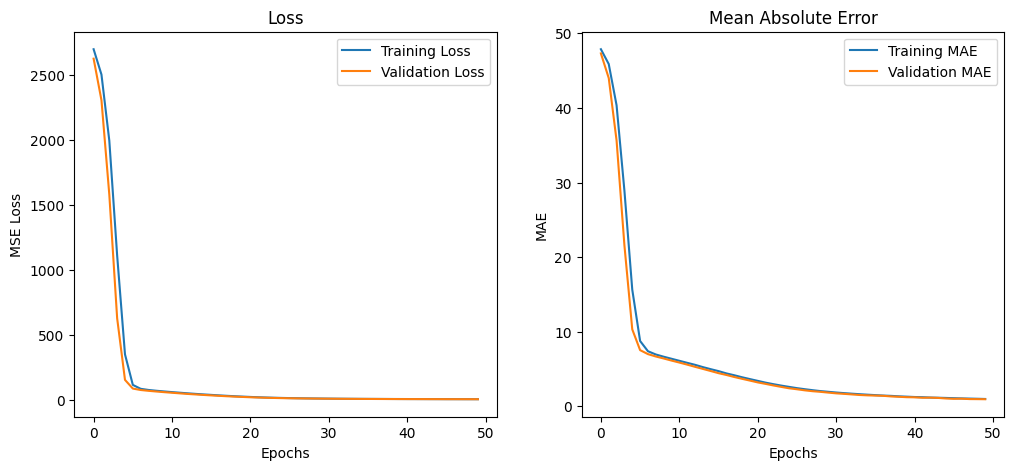

In [97]:
# Visualisasi MSE dan MAE selama pelatihan
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [98]:
# Prediksi AQI pada data uji
y_pred = model.predict(X_test)

# Membuat DataFrame untuk membandingkan hasil prediksi dengan nilai aktual
results = pd.DataFrame({
    'Actual AQI': y_test.values,
    'Predicted AQI': y_pred.flatten()
})

# Tampilkan hasil prediksi
results.head(10)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,Actual AQI,Predicted AQI
0,33,33.534565
1,86,84.878166
2,37,36.915829
3,23,22.458363
4,39,41.496250
5,39,40.503586
6,67,66.415047
7,31,31.072138
8,37,37.452000
9,38,39.670200


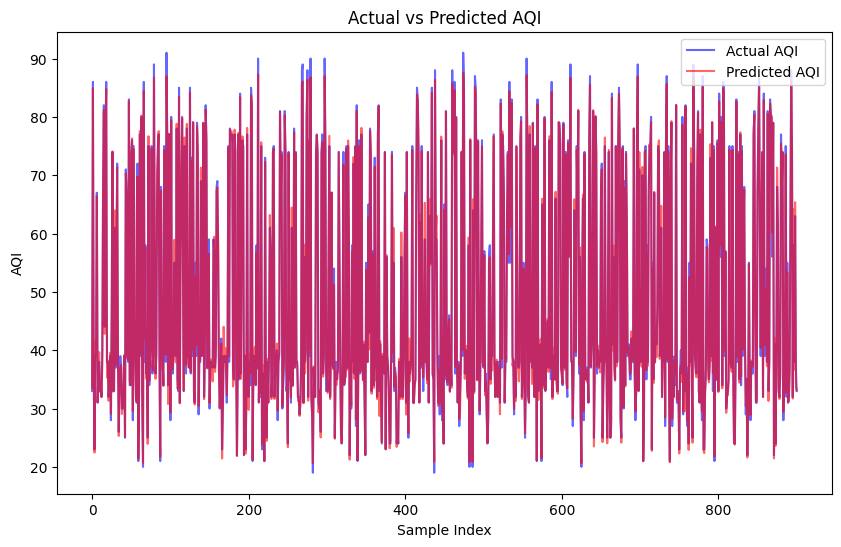

In [99]:
# Visualisasi perbandingan AQI aktual dan prediksi
plt.figure(figsize=(10, 6))
plt.plot(results['Actual AQI'], label='Actual AQI', color='blue', alpha=0.6)
plt.plot(results['Predicted AQI'], label='Predicted AQI', color='red', alpha=0.6)
plt.title('Actual vs Predicted AQI')
plt.xlabel('Sample Index')
plt.ylabel('AQI')
plt.legend()
plt.show()

In [100]:
# Save the model in TensorFlow SavedModel format
model.export('LinearModel')
print("Model saved successfully in SavedModel format!")

INFO:tensorflow:Assets written to: LinearModel\assets


INFO:tensorflow:Assets written to: LinearModel\assets


Saved artifact at 'LinearModel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='keras_tensor_215')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2608846174928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2608926548112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2608926548688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2608926549840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2608926550992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2608926554640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2608926551376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2608926551184: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model saved successfully in SavedModel format!
